# Advanced Clustering

## Preamble and Datasets

### install pakcages

In [1]:
# # Make sure you are running on Colab
# if 'google.colab' in str(get_ipython()):
#     print('Running on CoLab')
#     !pip install yellowbrick
#     !pip install gower
#     !pip install scikit-learn-extra
#     !pip install kmodes

In [2]:
# if you are using local server:
!pip install yellowbrick
!pip install gower
!pip install scikit-learn-extra
!pip install kmodes
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

### Load data and packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importing necessary libraries (metrics for cluster evaluation).
from sklearn.metrics import silhouette_samples, silhouette_score

 # Suppressing warnings for cleaner output.
import warnings
warnings.filterwarnings("ignore")
# Importing necessary libraries (to customize the Jupyter notebook behavior).
from IPython.core.interactiveshell import InteractiveShell
# Setting up the notebook to display all outputs in a cell.
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# # run this cell if you are using Colab

# !rm -rf fruit_data_with_colors.txt
# !rm -rf adspy_shared_utilities.py
# !rm -rf CommViolPredUnnormalizedData.txt

# import io

# from google.colab import files as colab_files
# uploaded = colab_files.upload()
# files = {'fruit_data_with_colors.txt': io.BytesIO(uploaded['fruit_data_with_colors.txt'])}

# # upload 'fruit_data_with_colors.txt', 'adspy_shared_utilities.py', and 'CommViolPredUnnormalizedData.txt'

In [5]:
# run this cell if you are using Jupyter
files = {'fruit_data_with_colors.txt': 'fruit_data_with_colors.txt', 'iris.data': 'iris.data'}

In [6]:

# Our sample fruits dataset
fruits = pd.read_table(files['fruit_data_with_colors.txt'])
# Extracting specific columns (features) from the fruits dataset for clustering.
X_fruits = fruits[['mass','width','height', 'color_score']]
# Extracting labels from the fruits dataset and adjusting the label values by subtracting 1.
y_fruits = fruits['fruit_label'].values - 1

# Our sample iris dataset
iris = pd.read_csv(
    files['iris.data'], 
    sep=',', 
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_type'])

# Extracting specific columns (features) from the iris dataset for clustering.
X_iris = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Getting the unique iris types (species) from the dataset.
unique_iris_types = iris.iris_type.unique()

# Creating a dictionary to map iris types to numerical labels.
lookup_iris_label = dict(zip(unique_iris_types, range(len(unique_iris_types))))

# Assigning numerical labels to each row in the iris dataset based on the iris type.
iris['iris_label'] = list(map(lambda x: lookup_iris_label[x], iris.iris_type))

# Extracting the numerical labels for the iris dataset.
y_iris = iris['iris_label'].values

## Clustering

## 1. Let's start with the dataset that you are familiar with!

### 1.1 Mixture of Gaussians

  File "C:\Users\Jessica\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


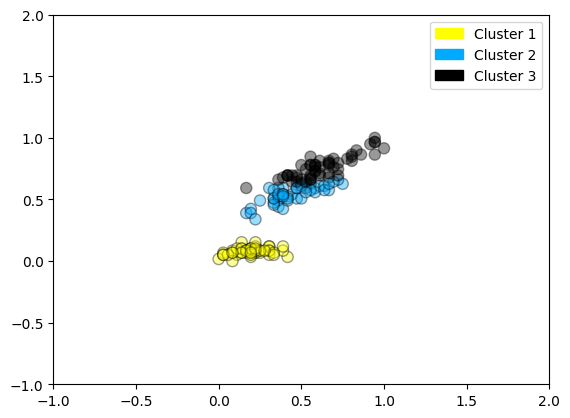

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from adspy_shared_utilities import plot_labelled_scatter

## Exercise: use MinMaxScaler to standardize X_iris

X_iris_normalized = MinMaxScaler().fit(X_iris).transform(X_iris)

## Exercise: use GaussianMixture (cluster number = 3) to train and assign cluster with the highest probability

# Initializing the GaussianMixture model with 3 clusters.
cls = GaussianMixture(n_components = 3)
# Training the GaussianMixture model and predicting the cluster assignments.
cls_assignment = cls.fit_predict(X_iris_normalized)

# x`Plotting the clusters.
plot_labelled_scatter(X_iris_normalized, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'],colx=0,coly=2)
# plt.scatter(X[:, 0], X[:, 2], s=65, c=y, alpha = 0.40, edgecolor='black', lw = 1)


<Axes: xlabel='sepal_length', ylabel='petal_length'>

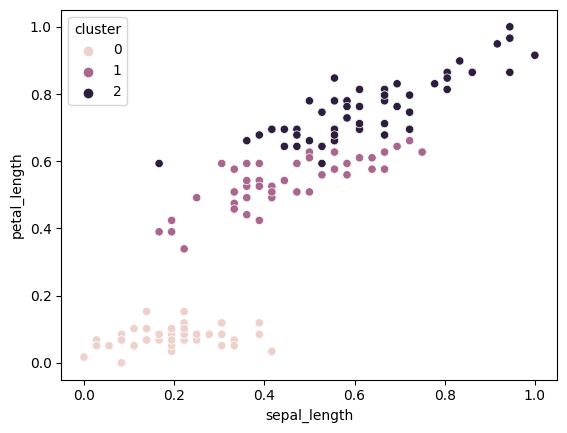

In [8]:
# Creating a DataFrame from the normalized iris data with specific column names.
gmm_df = pd.DataFrame(X_iris_normalized,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Adding a new 'cluster' column to the DataFrame, representing the cluster assignments from the GaussianMixture model.
gmm_df['cluster'] = cls_assignment

# Plotting a scatterplot using Seaborn, with sepal length on the x-axis, petal length on the y-axis, and color-coded by the cluster assignments.
sns.scatterplot(data=gmm_df,x='sepal_length',y='petal_length',hue='cluster')

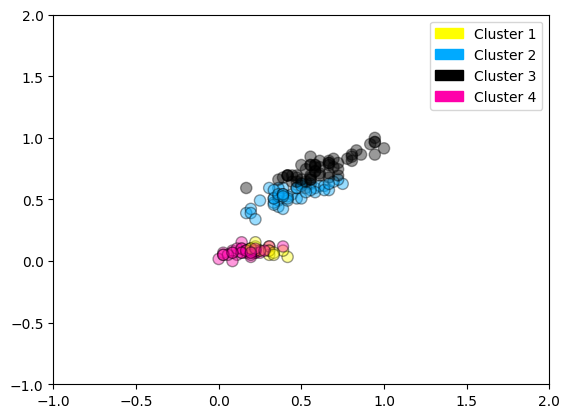

In [9]:
## cluster number = 4
# Re-normalizing the iris data using the MinMaxScaler.
X_iris_normalized = MinMaxScaler().fit(X_iris).transform(X_iris)

# Initializing the GaussianMixture model with 4 clusters.
cls = GaussianMixture(n_components = 4)

# Training the GaussianMixture model and predicting the cluster assignments for 4 clusters.
cls_assignment = cls.fit_predict(X_iris_normalized)

# Plotting the clusters with the defined labels and columns
plot_labelled_scatter(X_iris_normalized, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],colx=0,coly=2)

### 1.2 DBSCAN clustering

Cluster membership values:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  2  1
 -1  1  1  1  1  1  1  1  1  1  1  2  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1 -1  2  2  2 -1 -1 -1 -1 -1  2  2  2 -1 -1  2  2 -1 -1 -1
  2 -1 -1  2  2 -1  2  2  2 -1 -1 -1  2  1 -1 -1  2  2  2  2  2  2 -1  2
  2  2  2  2  2  2]


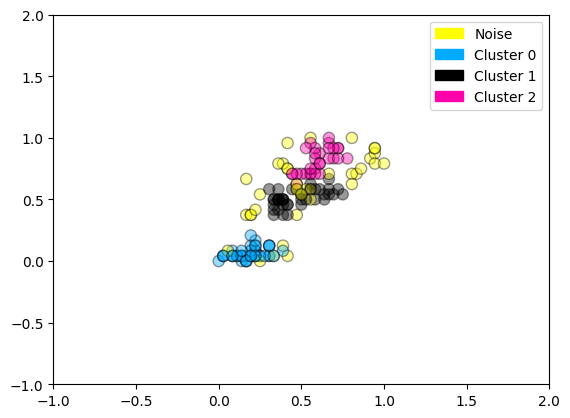

In [10]:
from sklearn.cluster import DBSCAN

# Re-normalizing the iris data using the MinMaxScaler.
X_iris_normalized = MinMaxScaler().fit(X_iris).transform(X_iris)

## Exercise: use DBSCAN with eps = 0.12 to train and assign data to clusters

dbscan = DBSCAN(eps = 0.12)

# Training the DBSCAN algorithm and predicting the cluster assignments.
cls = dbscan.fit_predict(X_iris_normalized)
# Printing the cluster membership values for each data point.
print("Cluster membership values:\n{}".format(cls))

## Exercise: visualize both the clusters and the noise 
plot_labelled_scatter(X_iris_normalized, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'],colx=0,coly=3)

## 2. Now let's look at dataset with categorical variables!

### Import Dataset 
Note: In this hands-on practice, we will use the publicly available `College` dataset, which has various statistics of US Colleges from 1995 (N = 777). 

In [11]:
# Import college dataset from Github repository
college_data = pd.read_csv('college.csv')

# Glimpse of dataframe
college_data.head()

,name,accept_rate,Outstate,Enroll,Grad.Rate,Private,isElite
0,Abilene Christian University,0.742169,7440,721,60,Yes,Not Elite
1,Adelphi University,0.880146,12280,512,56,Yes,Not Elite
2,Adrian College,0.768207,11250,336,54,Yes,Not Elite
3,Agnes Scott College,0.836930,12960,137,59,Yes,Elite
4,Alaska Pacific University,0.756477,7560,55,15,Yes,Not Elite


We now have data with mixed feature types:
* Continuous
    * ``accept_rate``: Acceptance rate
    * ``Outstate``: Out of state tuition
    * ``Enroll``: Number of new students enrolled
    * ``Grad.Rate``: Graduation rate
* Categorical
    * ``Private``: Whether a college is public/private
    * ``isElite``: Whether a college is elite, defined as having more than 50% of new students who graduated in the top 10% of their high school class

### K-prototypes

In [12]:
### preprocess the data
# Mix-max normalizing
# Applying MinMaxScaler to normalize the 'Outstate' and 'Enroll' columns of the college_data DataFrame.
college_data[['Outstate','Enroll']] = MinMaxScaler().fit(college_data[['Outstate','Enroll']]
                                                        ).transform(college_data[['Outstate','Enroll']])
# college_data['Outstate'] = MinMaxScaler().fit_transform(np.array(college_data['Outstate']).reshape(-1,1))
# college_data['Enroll'] = MinMaxScaler().fit_transform(np.array(college_data['Enroll']).reshape(-1,1))

# Drop 'name' column
college_data.drop(columns='name',inplace=True)

# Converting numerical columns datatype as float (requirment for kprototypes)
# Defining the columns that need to be converted to float datatype.
cont_cols = ['accept_rate', 'Outstate', 'Enroll', 'Grad.Rate']
# Converting the specified columns to float datatype.
college_data[cont_cols] = college_data[cont_cols].astype(float)
college_data[cont_cols]

,accept_rate,Outstate,Enroll,Grad.Rate
0,0.742169,0.263430,0.107913,60.0
1,0.880146,0.513430,0.075035,56.0
2,0.768207,0.460227,0.047349,54.0
3,0.836930,0.548554,0.016045,59.0
4,0.756477,0.269628,0.003146,15.0
...,...,...,...,...
772,0.689577,0.230217,0.079912,40.0
773,0.921388,0.474174,0.103823,83.0
774,0.913209,0.235537,0.103823,49.0
775,0.229145,0.903926,0.201667,99.0


In [13]:
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   accept_rate  777 non-null    float64
 1   Outstate     777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Grad.Rate    777 non-null    float64
 4   Private      777 non-null    object 
 5   isElite      777 non-null    object 
dtypes: float64(4), object(2)
memory usage: 36.5+ KB


In [14]:
from kmodes.kprototypes import KPrototypes

# Initializing the KPrototypes model with 3 clusters and a fixed random state for reproducibility.
kp_model = KPrototypes(n_clusters=3,random_state=10)

# Training the KPrototypes model on the college data and predicting cluster assignments. It also specifies which columns are categorical.
cls_assignment = kp_model.fit_predict(college_data.values, categorical=[4,5])

# Assigning the predicted cluster labels to a new column named 'cluster' in the college_data DataFrame.
college_data['cluster'] = cls_assignment

<Axes: xlabel='accept_rate', ylabel='Grad.Rate'>

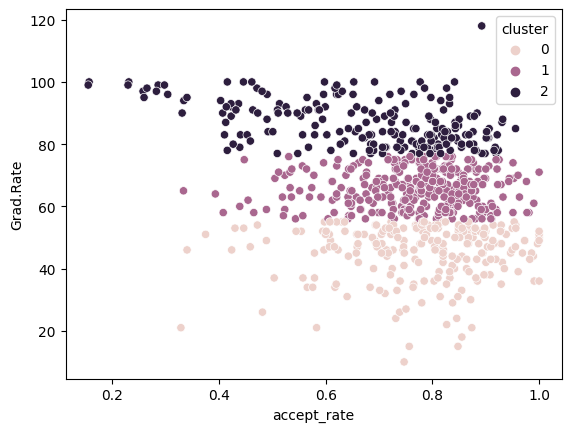

In [15]:
# Plotting a scatterplot using Seaborn with 'accept_rate' on the x-axis, 'Grad.Rate' on the y-axis, and color-coded by the 'cluster' assignments.
sns.scatterplot(data = college_data, x='accept_rate',y='Grad.Rate',hue='cluster')

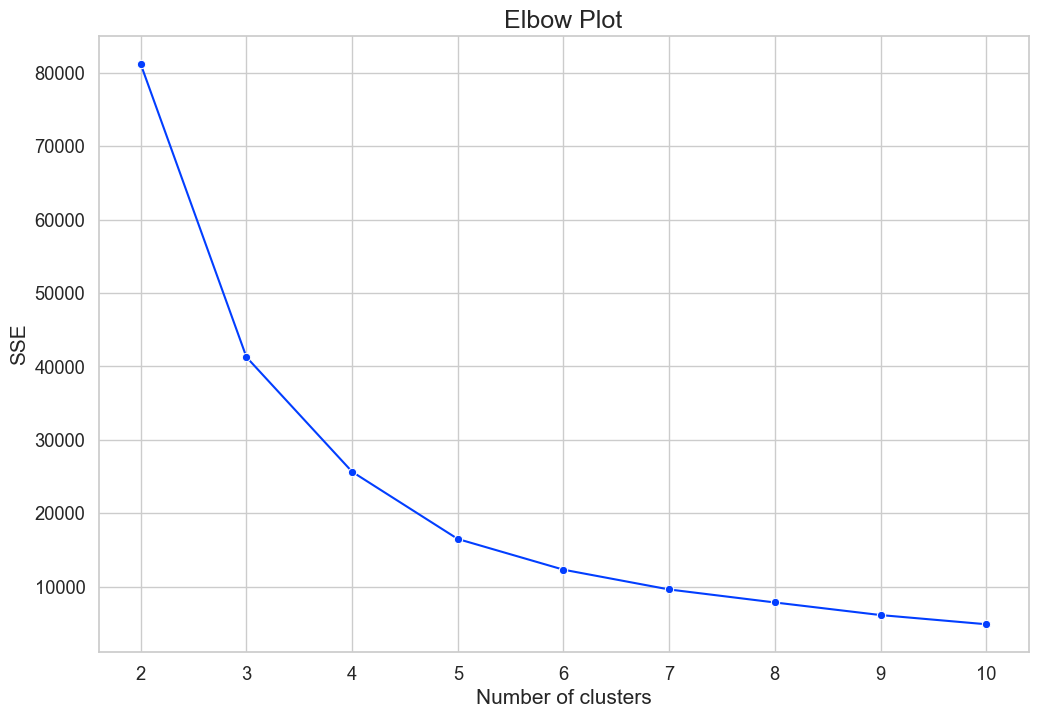

In [16]:
# Index of categorical columns (requirment for kprototypes)
categorical_index = [4,5]

# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):
    #Creating a list of cluster numbers based on the provided start and end values.
    no_of_clusters = list(range(start, end+1))
    # Initializing an empty list to store the cost (SSE) values for each number of clusters.
    cost_values = []
    
    # Starting a loop over the range of cluster numbers.
    for k in no_of_clusters:
        # Initializing the KPrototypes model for the current number of clusters with a fixed random state.
        kp_model = KPrototypes(n_clusters=k,random_state=10)
        # Training the KPrototypes model on the provided data and predicting cluster assignments.
        kp_model.fit_predict(data.values, categorical=categorical_index)
        # Appending the cost (SSE) value of the current model to the cost_values list.
        cost_values.append(kp_model.cost_)
    
    # Setting the Seaborn theme for the plot.
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    # etting the size of the figure for the plot.
    plt.figure(figsize=(12, 8))
    # Plotting the elbow curve using Seaborn's lineplot function.
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    # Setting the title, x-axis label, and y-axis label of the plot.
    ax.set_title('Elbow Plot', fontsize=18)
    ax.set_xlabel('Number of clusters', fontsize=15)
    ax.set_ylabel('SSE', fontsize=15)
    # Displaying the plot.
    plt.plot();

# Plotting elbow curve for k=2 to k=10
plot_elbow_curve(start=2,end=10,data = college_data[['accept_rate', 'Outstate', 'Enroll', 'Grad.Rate','Private', 'isElite']])

# 

# 

# 

## 3. Extra reading/resource I: An additional way to handle mixed data: Gower Distance

A distance that automatically calculated the weighted average of continuous and categorical variables.

For each variable type, Gower will select a particular distance metric that works well for that type and scale it to fall between 0 and 1. Then, a linear combination using user-specified weights (most simply an average) is calculated to create the final distance matrix. 
The metrics used for each data type are described below:

* quantitative (interval): range-normalized Manhattan distance
* ordinal: variable is first ranked, then Manhattan distance is used with a special adjustment for ties
* nominal: variables of k categories are first converted into k binary columns and then the (Dice coefficient)
[http://stats.stackexchange.com/a/55802/21654] is used

In [17]:
import gower
college_data = pd.read_csv('college.csv')
# Preprocessing: log-transforming positive-skewed variable (=Enroll)
college_data['Enroll'] = np.log(college_data['Enroll'])

In [18]:
# Calculate pairwise distance
gower_dist = gower.gower_matrix(college_data.iloc[:, 1:])
# Print the shape of matrix
print("Shape of matrix:", gower_dist.shape) # Should be 777x777

Shape of matrix: (777, 777)


In [19]:
gower_dist

array([[0.        , 0.08599342, 0.07162857, ..., 0.05651488, 0.45401013,
        0.10659871],
       [0.08599342, 0.        , 0.04749991, ..., 0.07341567, 0.4566702 ,
        0.18987173],
       [0.07162857, 0.04749991, 0.        , ..., 0.09700859, 0.4600395 ,
        0.17550686],
       ...,
       [0.05651488, 0.07341567, 0.09700859, ..., 0.        , 0.510525  ,
        0.15146512],
       [0.45401013, 0.4566702 , 0.4600395 , ..., 0.510525  , 0.        ,
        0.392315  ],
       [0.10659871, 0.18987173, 0.17550686, ..., 0.15146512, 0.392315  ,
        0.        ]], dtype=float32)

In [20]:
# Sanity Check: "gower_topn" function gives us n most similar records and their distances in decimals

## To check, let's print 4 closest universities of the 2nd university (Adelphi University) using gower_topn
gower.gower_topn(college_data.iloc[1:2, 1:], college_data.iloc[:, 1:], n = 5)

{'index': array([  1,  90, 210, 479, 373], dtype=int64),
 'values': array([0.        , 0.02239485, 0.02467051, 0.02502211, 0.0273944 ],
       dtype=float32)}

In [21]:
## Let's manually find out whether it makes sense! And from the results: They seem to be very homogenous! so sanity check passed.
# Random Example: Adelphi University
print("Random Example")
college_data.iloc[[1]]

# It's closest records
print("1st closest\n")
college_data.iloc[[90]]
print("2nd closest\n")
college_data.iloc[[210]]
print("3rd closest\n")
college_data.iloc[[479]]
print("4th closest\n")
college_data.iloc[[373]]

Random Example


,name,accept_rate,Outstate,Enroll,Grad.Rate,Private,isElite
1,Adelphi University,0.880146,12280,6.238325,56,Yes,Not Elite


1st closest



,name,accept_rate,Outstate,Enroll,Grad.Rate,Private,isElite
90,Carthage College,0.883045,13125,6.073045,62,Yes,Not Elite


2nd closest



,name,accept_rate,Outstate,Enroll,Grad.Rate,Private,isElite
210,Franklin Pierce College,0.861963,13320,6.100319,51,Yes,Not Elite


3rd closest



,name,accept_rate,Outstate,Enroll,Grad.Rate,Private,isElite
479,Roger Williams University,0.848668,12520,6.520621,61,Yes,Not Elite


4th closest



,name,accept_rate,Outstate,Enroll,Grad.Rate,Private,isElite
373,Milwaukee School of Engineering,0.894002,11505,6.206576,67,Yes,Not Elite


### How to use Gower? K-Medoids as an Example
Now that we computed distances between our (mixed-type) points, we can use any clustering algorithm that operates on a distance matrix. 
K-mediods (Partioning Around Mediods) is one such example.

In [22]:
from sklearn_extra.cluster import KMedoids

#### KMedoids 1. Hyperparameter (i.e., # of clusters) selection

(<Figure size 800x500 with 1 Axes>, <Axes: >)

Text(0.5, 1.0, 'Silhouette Score (K-medoids)')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette')

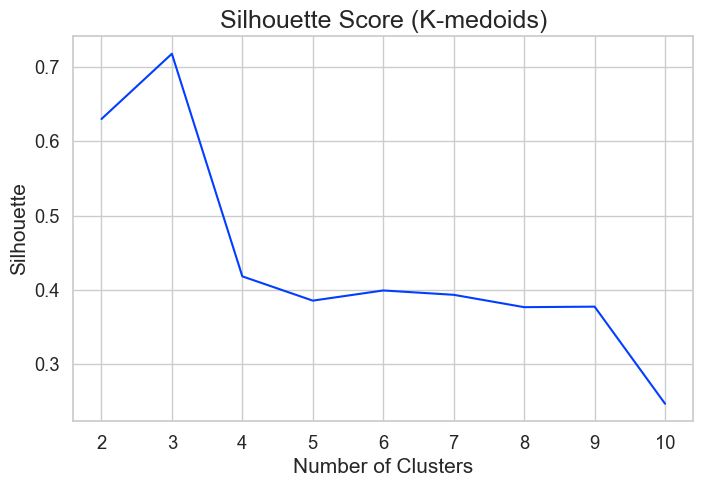

In [23]:
# Initializing an empty list to store silhouette scores for various numbers of clusters.
silhouette_score_list =[]

# Starting a loop over a range of cluster numbers from 2 to 10.
for n_clusters in range(2, 11):
   
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters = n_clusters, random_state = 10, method = 'pam') 
    cls_assignment = clusterer.fit_predict(gower_dist)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(gower_dist, cls_assignment)
    silhouette_score_list.append(silhouette_avg)

# Setting up a plotting figure with a specific size.
plt.subplots(figsize=(8,5))

# Plotting the silhouette scores for the range of clusters from 2 to 10.
plt.plot(range(2, 11), silhouette_score_list)

# Setting the title, x-axis label, and y-axis label of the plot.
plt.title('Silhouette Score (K-medoids)', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Silhouette', fontsize=15)

# Displaying the plot.
plt.show()

#### KMedoids 2. Choose the best number of clusters and finalize the clustering results
It appears that 3 are the optimal number of clusters. 
Let's run the algorithm and select 3 as the number of clusters, and we can interpret the clusters by running summary on each cluster. 

In [24]:
new_num_clusters = 3

# Fit model
clusterer = KMedoids(n_clusters = new_num_clusters, random_state = 10, method = 'pam') 
cls_assignment = clusterer.fit_predict(gower_dist)

# Add cluster column
college_data['cluster'] = cls_assignment

# Summary statistics by cluster
print('accept_rate')
college_data.groupby('cluster')['accept_rate'].describe()
print('Outstate')
college_data.groupby('cluster')['Outstate'].describe()
print('Enroll')
college_data.groupby('cluster')['Enroll'].describe()
print('Grad.Rate')
college_data.groupby('cluster')['Grad.Rate'].describe()
print('Private')
college_data.groupby('cluster')['Private'].describe()
print('isElite')
college_data.groupby('cluster')['isElite'].describe()

accept_rate


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,70.0,0.537386,0.198829,0.154486,0.412638,0.530807,0.695883,0.960474
1,499.0,0.782094,0.112018,0.328333,0.722448,0.800446,0.858186,1.000000
2,208.0,0.733081,0.140481,0.374607,0.642830,0.745785,0.836807,1.000000


Outstate


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,70.0,16112.728571,3321.437178,5224.0,13775.00,17234.0,18563.75,20100.0
1,499.0,11217.310621,3310.413023,4371.0,8871.00,10910.0,13240.00,21700.0
2,208.0,6668.610577,2000.048598,2340.0,5162.25,6573.5,7712.25,15516.0


Enroll


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,70.0,6.491380,0.806024,4.919981,5.985401,6.423742,7.098745,8.495561
1,499.0,5.747289,0.707828,3.555348,5.270429,5.730100,6.182085,8.245384
2,208.0,7.087254,0.821761,5.030438,6.542469,7.171657,7.689024,8.762802


Grad.Rate


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,70.0,84.757143,11.893776,54.0,77.0,89.0,94.00,100.0
1,499.0,67.042084,16.140082,15.0,56.0,68.0,78.50,118.0
2,208.0,55.182692,13.935853,10.0,46.0,54.0,64.25,100.0


Private


,count,unique,top,freq
cluster,,,,
0,70,2,Yes,65
1,499,1,Yes,499
2,208,2,No,207


isElite


,count,unique,top,freq
cluster,,,,
0,70,1,Elite,70
1,499,1,Not Elite,499
2,208,2,Not Elite,200


#### KMedoids 3. Interpreting the results
Based on these results, it seems as though 
- Cluster 0: is mainly Private/Not Elite with high levels of out of state tuition and medium levels of enrollment.
- Cluster 1: is mainly Private/Elite with high levels of acceptance rates, medium levels of out of state tuition, and medium graduation rates. 
- Cluster 2: is mainly Public/Not Elite with the lowest levels of tuition, largest levels of enrollment, and lowest graduation rate.

# 
# 
# 
# 


## 4. Extra reading/resource II: K-means and hierarchical clustering for your reference

### K-means

This example use the iris dataset, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

KMeans(n_clusters=3)

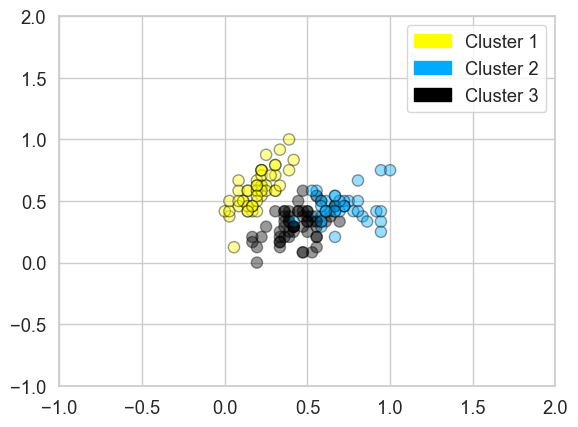

In [25]:
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

# Normalizing the iris data using the MinMaxScaler.
X_iris_normalized = MinMaxScaler().fit(X_iris).transform(X_iris)

# Initializing the KMeans clustering model with 3 clusters.
kmeans = KMeans(n_clusters = 3)
# Training the KMeans model on the normalized iris data.
kmeans.fit(X_iris_normalized)

# Plotting the clusters using the imported utility function with specific labels.
plot_labelled_scatter(X_iris_normalized, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


#### (Exercise) Use k-means  to find 4 clusters in the fruits dataset. 

Note that in general, it's important to scale the individual features before applying k-means clustering. Please first scale the `X_fruits` by `MinMaxScaler` and then fit it to k-means.

KMeans(n_clusters=4, random_state=0)

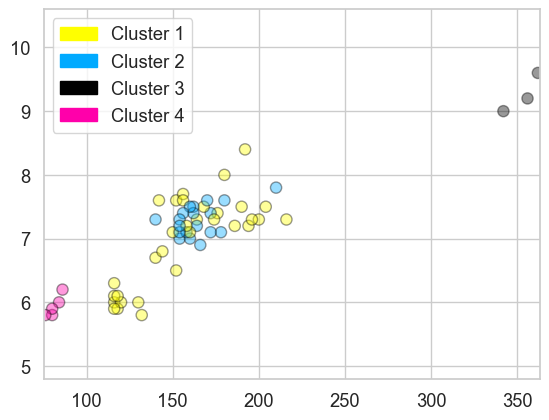

In [26]:
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].values
# Extracting the fruit labels and adjusting them by subtracting 1.
y_fruits = fruits[['fruit_label']] - 1

# Normalizing the fruits data using the MinMaxScaler.
X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  # %%% Your code: scale X_fruits.

# %%% Your code: fit a k-means
# Initializing the KMeans clustering model with 4 clusters and a fixed random state.
kmeans = KMeans(n_clusters = 4, random_state = 0)
# Training the KMeans model on the normalized fruits data.
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

#### (Exercise) Work out one iteration of k-means update on 1-dimensional toy dataset

We have a 1-dimensional toy dataset with 10 data points $[0.29, 0.34, 0.35, 0.49, 0.56, 0.57, 0.72, 0.78, 0.83, 0.97]$, and we want to conduct k-means clustering on it with $k=2$. Suppose we initialized the two centers as $c_1 = 0$ and $c_2 = 1$. After one iteration of k-means update on this dataset, what will be the value of centers $c_1$ and $c_2$?

0.29, 0.34, 0.35, 0.49, 0.56, 0.57, 0.72, 0.78, 0.83, 0.97


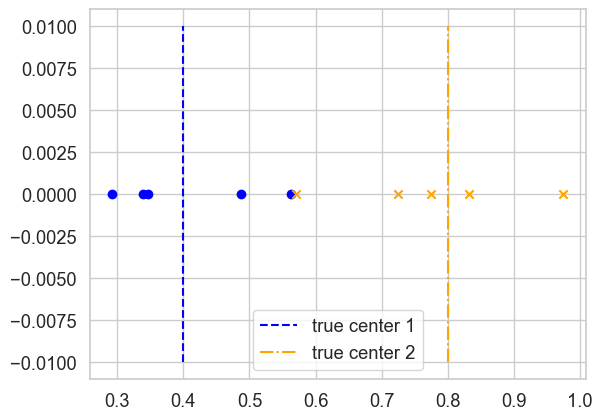

In [27]:
# Generate the data from two distribution and visualize

# Initializing a random state with a seed value of 1 for reproducibility.
rs = np.random.RandomState(1)

# Generating 5 random samples from a normal distribution with mean 0.4 and standard deviation 0.1.
x1 = rs.normal(loc=0.4, scale=0.1, size=(5,))

# Generating 5 random samples from a normal distribution with mean 0.8 and standard deviation 0.1.
x2 = rs.normal(loc=0.8, scale=0.1, size=(5,))

# Concatenating the two generated arrays into a single array.
x = np.concatenate([x1, x2])

# Plotting the samples from the first and second distribution as blue circles.
plt.scatter(x1, np.zeros_like(x1), marker='o', color='blue')
plt.scatter(x2, np.zeros_like(x2), marker='x', color='orange')

# Drawing a dashed blue line to indicate the true center of the first distribution.
plt.plot([0.4, 0.4], [-0.01, 0.01], '--', c='blue', label="true center 1")
# Drawing a dashed-dot orange line to indicate the true center of the second distribution.
plt.plot([0.8, 0.8], [-0.01, 0.01], '-.', c='orange', label='true center 2')
plt.legend()
print(", ".join(["{:.2f}".format(i) for i in sorted(x)]))

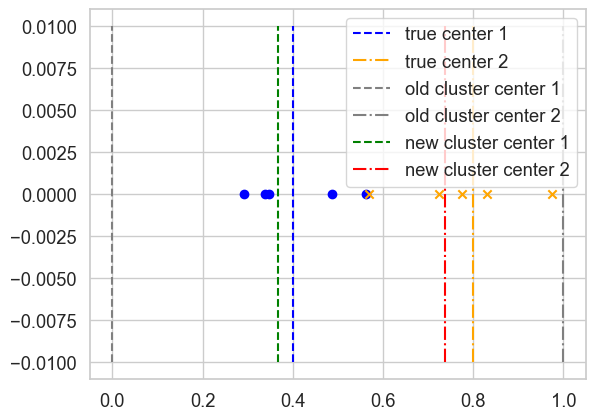

In [28]:
# %%% Your answer for c1 and c2
c1 = np.mean([0.29, 0.34, 0.35, 0.49])
c2 = np.mean([0.56, 0.57, 0.72, 0.78, 0.83, 0.97])

# Plotting the samples from the first and second distribution as blue circles.
plt.scatter(x1, np.zeros_like(x1), marker='o', color='blue')
plt.scatter(x2, np.zeros_like(x2), marker='x', color='orange')
plt.plot([0.4, 0.4], [-0.01, 0.01], '--', c='blue', label="true center 1")
plt.plot([0.8, 0.8], [-0.01, 0.01], '-.', c='orange', label='true center 2')
plt.plot([0, 0], [-0.01, 0.01], '--', c='gray', label="old cluster center 1")
plt.plot([1, 1], [-0.01, 0.01], '-.', c='gray', label='old cluster center 2')
plt.plot([c1, c1], [-0.01, 0.01], '--', c='green', label="new cluster center 1")
plt.plot([c2, c2], [-0.01, 0.01], '-.', c='red', label='new cluster center 2')
plt.legend()

#### Elbow plot for choosing k

(Question) What is the best k according to the following plot?

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

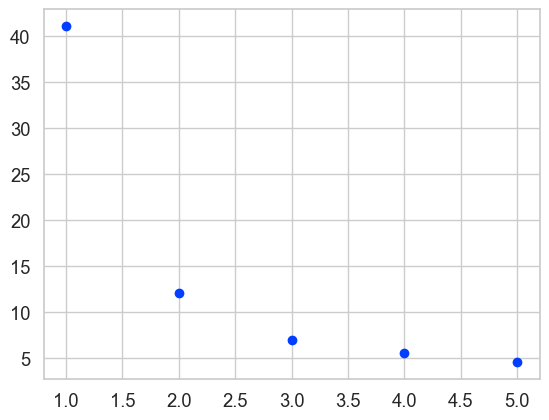

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Normalizing the iris data using the MinMaxScaler.
X_iris_normalized = MinMaxScaler().fit(X_iris).transform(X_iris)

# Initializing an empty list to store the scores.
scores = []

# Starting a loop over a range of cluster numbers from 1 to 5.
for k in range(1, 6):
    
    # Initializing the KMeans clustering model with the current number of clusters.
    kmeans = KMeans(n_clusters = k)
    # Training the KMeans model on the normalized iris data.
    kmeans.fit(X_iris_normalized)
    # Appending the negative score of the model to the scores list. The negative sign is used as KMeans returns negative inertia.
    scores.append(-kmeans.score(X_iris_normalized))

# Plotting the scores for the range of clusters from 1 to 5.
plt.scatter(list(range(1, 6)), scores)

### Agglomerative clustering

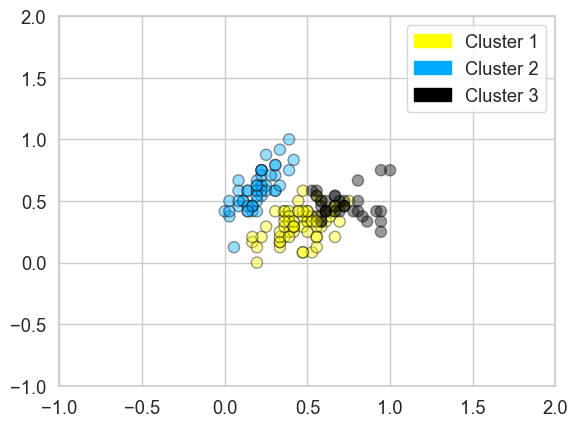

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

# Normalizing the iris data using the MinMaxScaler.
X_iris_normalized = MinMaxScaler().fit(X_iris).transform(X_iris)

# Initializing the AgglomerativeClustering model with 3 clusters.
cls = AgglomerativeClustering(n_clusters = 3)

# Training the AgglomerativeClustering model on the normalized iris data and predicting cluster assignments.
cls_assignment = cls.fit_predict(X_iris_normalized)

# Plotting the clusters
plot_labelled_scatter(X_iris_normalized, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

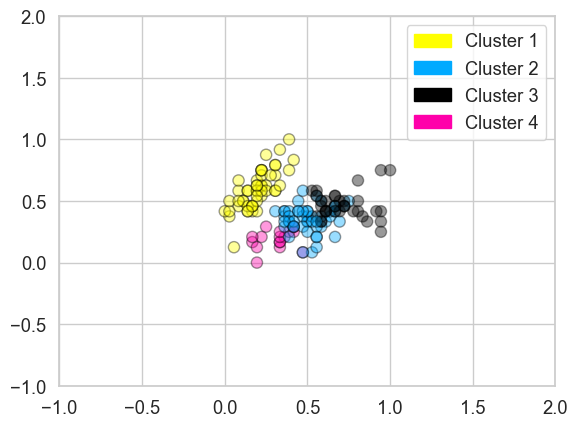

In [31]:
# Initializing the AgglomerativeClustering model with 4 clusters.
cls = AgglomerativeClustering(n_clusters = 4)

# Training the AgglomerativeClustering model on the normalized iris data and predicting cluster assignments.
cls_assignment = cls.fit_predict(X_iris_normalized)

# Plotting the clusters
plot_labelled_scatter(X_iris_normalized, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

#### Creating a dendrogram (using scipy)

This dendrogram plot is based on the iris dataset, but for clarity, only 10 samples have been randomly selected for this example, as plotted here:

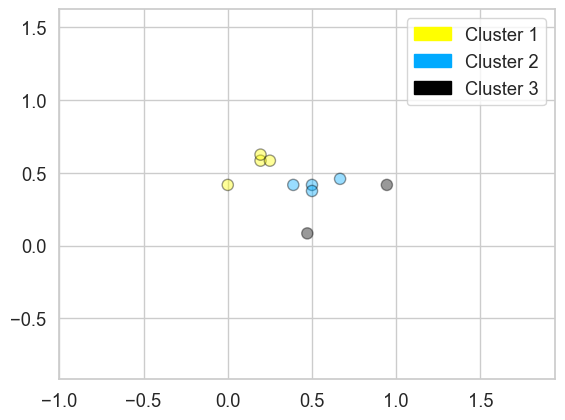

[[0.66666667 0.45833333 0.57627119 0.54166667]
 [0.5        0.41666667 0.61016949 0.54166667]
 [0.94444444 0.41666667 0.86440678 0.91666667]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.47222222 0.08333333 0.6779661  0.58333333]
 [0.5        0.375      0.62711864 0.54166667]
 [0.         0.41666667 0.01694915 0.        ]
 [0.19444444 0.625      0.05084746 0.08333333]
 [0.25       0.58333333 0.06779661 0.04166667]
 [0.38888889 0.41666667 0.54237288 0.45833333]]


In [32]:
import random

X_iris_normalized = MinMaxScaler().fit(X_iris).transform(X_iris)

# Setting a random seed for reproducibility.
random.seed(5)
# Randomly selecting 10 indices from the normalized iris data.
selected_index = random.sample(range(X_iris_normalized.shape[0]), 10)

# Extracting the data points corresponding to the randomly selected indices.
X = X_iris_normalized[selected_index]
# Extracting the labels corresponding to the randomly selected indices.
y = y_iris[selected_index]

# Plotting the clusters.
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 1 (0.5, 0.41666667, 0.61016949, 0.54166667) and point 5 (0.5, 0.375, 0.62711864, 0.54166667) are the closest two points and are clustered first.

<Figure size 640x480 with 0 Axes>

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [45.0, 45.0, 64.375, 64.375],
  [13.75, 13.75, 54.6875, 54.6875]],
 'dcoord': [[0.0, 0.05808350475815873, 0.05808350475815873, 0.0],
  [0.0, 0.08074811161696385, 0.08074811161696385, 0.05808350475815873],
  [0.0, 0.35417244938624387, 0.35417244938624387, 0.08074811161696385],
  [0.0, 0.04498205067597235, 0.04498205067597235, 0.0],
  [0.0, 0.18454067344133662, 0.18454067344133662, 0.04498205067597235],
  [0.0, 0.26165004500057626, 0.26165004500057626, 0.18454067344133662],
  [0.0, 0.4466254906479807, 0.4466254906479807, 0.26165004500057626],
  [0.0, 0.8270268818080186, 0.8270268818080186, 0.4466254906479807],
  [0.35417244938624387,
   2.0485069403870653,
   2.0485069403870653,
   0.8270268818080186]],
 'ivl': ['6', '7', '3', '8', '2', '4', '0', '9', '1', '5'],
 'leaves': [6, 7, 3, 

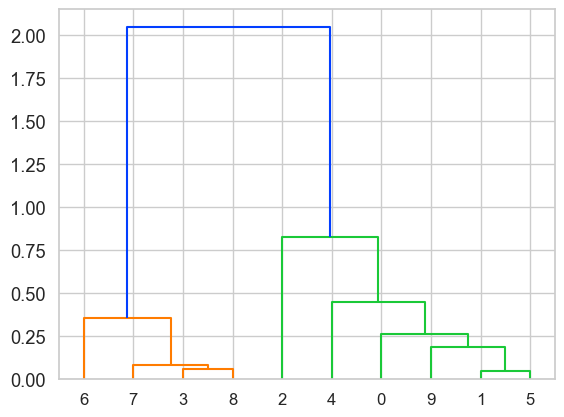

In [33]:
# Plotting a dendrogram using the ward method for the selected data points.
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

#### Get the dendrogram of a 1-dimensional toy dataset

We have a 1-dimensional toy dataset with 5 data points $[1, 2, 4, 7, 7]$, what will be the resulted dendrogram if you use average linkage as the criteria for agglomerative clustering? Please give the sequence of clusters (that have more than 1 data points) generated in the process of agglomerative clustering.

The average linkage of two clusters $A$ and $B$ in this 1-dimensional case is defined as $\frac{1}{|A|\cdot|B|}\sum_{a\in A}\sum_{b\in B} |a - b|$, where $|A|$ means the number of data points in $A$ and similar for $|B|$.



Answer: (7, 7), (1, 2), (1, 2, 4), (1,2,4,7,7)